## Double checking if this notebook has any errors

### please note df.to_csv("census_data_9_1.csv", index=False) is a clean csv. It has the median income per state. 

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
import pandas as pd

df=pd.read_csv('population_census_columns_cleaned.csv')
df

,Unnamed: 0,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,...,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,County,State
0,0,1001,58761,NaN,43747,345,11496,525,59,71,...,68315.0,4941.0,1864,NaN,6630,1081,58291,87,Autauga County,Alabama
1,1,1003,233420,NaN,195998,1247,19445,746,848,325,...,71039.0,2374.0,11210,NaN,23445,2134,229539,273,Baldwin County,Alabama
2,2,1005,24877,NaN,11309,221,11668,220,74,39,...,39712.0,3289.0,1202,NaN,5280,582,21851,109,Barbour County,Alabama
3,3,1007,22251,NaN,16872,225,4603,294,21,25,...,50669.0,8260.0,650,NaN,4297,751,20836,283,Bibb County,Alabama
4,4,1009,59077,NaN,53941,683,729,196,227,157,...,57440.0,3308.0,5721,NaN,8277,964,58399,114,Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,3217,72145,54182,NaN,21954,1708,2444,629,0,35,...,23701.0,1606.0,53023,318.0,23265,1386,53847,149,Vega Baja Municipio,Puerto Rico
3218,3218,72147,8199,NaN,1813,622,579,362,0,21,...,17062.0,999.0,7744,286.0,4433,732,8199,21,Vieques Municipio,Puerto Rico
3219,3219,72149,21984,NaN,8732,1041,1889,553,16,25,...,22461.0,3326.0,21905,62.0,9342,984,21858,69,Villalba Municipio,Puerto Rico
3220,3220,72151,30313,NaN,2393,494,11349,1294,0,31,...,19972.0,1975.0,30252,59.0,15070,1007,30293,5,Yabucoa Municipio,Puerto Rico


In [5]:
df=pd.read_csv('privateschools_with_geocodes.csv')
df

,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,STFIP,...,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,County
0,-86.541877,32.472090,1,2722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1069,1030,2021-2022,1.001020e+09,Autauga County
1,-86.458475,32.469350,2,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE RD,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001021e+09,Autauga County
2,-86.472061,32.460800,3,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
3,-86.466175,32.455425,4,A1592005,NEW HOPE ACADEMY,301 WATER ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001020e+09,Autauga County
4,-86.470441,32.461710,5,K9300030,FIRST BAPTIST PRESCHOOL AND KINDERGARTEN,138 S WASHINGTON ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,-110.810241,43.491060,22341,A0303404,MOUNTAIN ACADEMY OF TETON SCIENCE SCHOOLS,700 COYOTE CANYON RD,JACKSON,WY,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County
22341,-110.799526,43.458650,22342,A0903887,JACKSON HOLE COMMUNITY SCHOOL,"1715 HIGH SCHOOL ROAD, #240",JACKSON,WY,83001,56,...,N,N,N,N,5600,56016,56017,2021-2022,5.603997e+10,Teton County
22342,-110.844286,43.367002,22343,A1102418,RED TOP MEADOWS,7905 FALL CREEK RD,WILSON,WY,83014,56,...,N,N,N,N,5600,56022,56016,2021-2022,5.603997e+10,Teton County
22343,-110.810901,43.441910,22344,A2000010,JACKSON HOLE CLASSICAL ACADEMY,2500 S PARK LOOP RD,JACKSON,WY,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County


In [6]:
df = df.rename(columns={'STATE': 'State'})
df

,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,State,ZIP,STFIP,...,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,County
0,-86.541877,32.472090,1,2722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1069,1030,2021-2022,1.001020e+09,Autauga County
1,-86.458475,32.469350,2,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE RD,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001021e+09,Autauga County
2,-86.472061,32.460800,3,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
3,-86.466175,32.455425,4,A1592005,NEW HOPE ACADEMY,301 WATER ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001020e+09,Autauga County
4,-86.470441,32.461710,5,K9300030,FIRST BAPTIST PRESCHOOL AND KINDERGARTEN,138 S WASHINGTON ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,-110.810241,43.491060,22341,A0303404,MOUNTAIN ACADEMY OF TETON SCIENCE SCHOOLS,700 COYOTE CANYON RD,JACKSON,WY,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County
22341,-110.799526,43.458650,22342,A0903887,JACKSON HOLE COMMUNITY SCHOOL,"1715 HIGH SCHOOL ROAD, #240",JACKSON,WY,83001,56,...,N,N,N,N,5600,56016,56017,2021-2022,5.603997e+10,Teton County
22342,-110.844286,43.367002,22343,A1102418,RED TOP MEADOWS,7905 FALL CREEK RD,WILSON,WY,83014,56,...,N,N,N,N,5600,56022,56016,2021-2022,5.603997e+10,Teton County
22343,-110.810901,43.441910,22344,A2000010,JACKSON HOLE CLASSICAL ACADEMY,2500 S PARK LOOP RD,JACKSON,WY,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County


In [7]:
import us
state_abbrev_to_name = {state.abbr: state.name for state in us.states.STATES}
df['State'] = df['State'].map(state_abbrev_to_name)
df

,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,State,ZIP,STFIP,...,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,County
0,-86.541877,32.472090,1,2722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,Alabama,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1069,1030,2021-2022,1.001020e+09,Autauga County
1,-86.458475,32.469350,2,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE RD,PRATTVILLE,Alabama,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001021e+09,Autauga County
2,-86.472061,32.460800,3,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,Alabama,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
3,-86.466175,32.455425,4,A1592005,NEW HOPE ACADEMY,301 WATER ST,PRATTVILLE,Alabama,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001020e+09,Autauga County
4,-86.470441,32.461710,5,K9300030,FIRST BAPTIST PRESCHOOL AND KINDERGARTEN,138 S WASHINGTON ST,PRATTVILLE,Alabama,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,-110.810241,43.491060,22341,A0303404,MOUNTAIN ACADEMY OF TETON SCIENCE SCHOOLS,700 COYOTE CANYON RD,JACKSON,Wyoming,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County
22341,-110.799526,43.458650,22342,A0903887,JACKSON HOLE COMMUNITY SCHOOL,"1715 HIGH SCHOOL ROAD, #240",JACKSON,Wyoming,83001,56,...,N,N,N,N,5600,56016,56017,2021-2022,5.603997e+10,Teton County
22342,-110.844286,43.367002,22343,A1102418,RED TOP MEADOWS,7905 FALL CREEK RD,WILSON,Wyoming,83014,56,...,N,N,N,N,5600,56022,56016,2021-2022,5.603997e+10,Teton County
22343,-110.810901,43.441910,22344,A2000010,JACKSON HOLE CLASSICAL ACADEMY,2500 S PARK LOOP RD,JACKSON,Wyoming,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County


In [54]:
df.to_csv("privateschools_with_geocodes_2.csv")

In [8]:
%%R 

df <- read.csv("population_census_columns_cleaned_1.csv") 
new_census_data_df <- read.csv("privateschools_with_geocodes_2.csv") 
total_2 <- merge(df, new_census_data_df, by = c("County", "State"), all = FALSE)

In [56]:
%%R 
write.csv(total_2, "4.23_1.csv", row.names = FALSE)

In [9]:
import pandas as pd
df=pd.read_csv('4.23_1.csv')
df

,County,State,X.x,Unnamed..0,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract
0,Abbeville County,South Carolina,2318,2318,45001,24368,NaN,16915,163,6372,...,1,N,N,N,N,4502,45081,45024,2021-2022,45001950402
1,Abbeville County,South Carolina,2318,2318,45001,24368,NaN,16915,163,6372,...,N,N,N,N,N,4503,45011,45010,2021-2022,45001950200
2,Acadia Parish,Louisiana,1115,1115,22001,57674,NaN,45230,374,9511,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22026,2021-2022,22001960801
3,Acadia Parish,Louisiana,1115,1115,22001,57674,NaN,45230,374,9511,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22042,22026,2021-2022,22001960602
4,Acadia Parish,Louisiana,1115,1115,22001,57674,NaN,45230,374,9511,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22025,2021-2022,22001960801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22212,Yuma County,Arizona,111,111,4027,204374,NaN,118769,2691,3969,...,1,N,N,N,N,404,4001,4001,2021-2022,4027000800
22213,Yuma County,Arizona,111,111,4027,204374,NaN,118769,2691,3969,...,1,N,N,N,N,404,4013,4013,2021-2022,4027000800
22214,Yuma County,Arizona,111,111,4027,204374,NaN,118769,2691,3969,...,1,N,N,N,N,401,4006,4006,2021-2022,4027000502
22215,Yuma County,Arizona,111,111,4027,204374,NaN,118769,2691,3969,...,1,N,N,N,N,403,4004,4004,2021-2022,4027011121


In [58]:
df.dtypes

County                object
State                 object
X.x                    int64
Unnamed..0             int64
GEOID                  int64
total_popE             int64
total_popM           float64
whiteE                 int64
whiteM                 int64
blackE                 int64
blackM                 int64
native_americanE       int64
native_americanM       int64
asianE                 int64
asianM                 int64
pacific_islanderE      int64
pacific_islanderM      int64
other_raceE            int64
other_raceM            int64
two_or_moreE           int64
two_or_moreM           int64
med_incE               int64
med_incM               int64
hispanicE              int64
hispanicM            float64
poverty_incomeE        int64
poverty_incomeM        int64
poverty_totalE         int64
poverty_totalM         int64
X.1                    int64
X.y                  float64
Y                    float64
OBJECTID               int64
PPIN                  object
NAME          

In [10]:
df = df.drop(columns=['Unnamed..0', 'X.x'])
df

,County,State,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract
0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,1,N,N,N,N,4502,45081,45024,2021-2022,45001950402
1,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,N,N,N,N,N,4503,45011,45010,2021-2022,45001950200
2,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22026,2021-2022,22001960801
3,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22042,22026,2021-2022,22001960602
4,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22025,2021-2022,22001960801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22212,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,404,4001,4001,2021-2022,4027000800
22213,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,404,4013,4013,2021-2022,4027000800
22214,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,401,4006,4006,2021-2022,4027000502
22215,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,403,4004,4004,2021-2022,4027011121


## This is now the proper, clean version of this df. It has the name of the private school, population for each along with Lat and Lon data. 

In [76]:
df.to_csv('4_23_private_schoolswithpopulation.csv')

## Now time to get the count of private schools per county. 

In [15]:
import pandas as pd
df=pd.read_csv('4_23_private_schoolswithpopulation.csv')
df

,Unnamed: 0,County,State,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract
0,0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,...,1,N,N,N,N,4502,45081,45024,2021-2022,45001950402
1,1,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,...,N,N,N,N,N,4503,45011,45010,2021-2022,45001950200
2,2,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22026,2021-2022,22001960801
3,3,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22042,22026,2021-2022,22001960602
4,4,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22025,2021-2022,22001960801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22212,22212,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,...,1,N,N,N,N,404,4001,4001,2021-2022,4027000800
22213,22213,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,...,1,N,N,N,N,404,4013,4013,2021-2022,4027000800
22214,22214,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,...,1,N,N,N,N,401,4006,4006,2021-2022,4027000502
22215,22215,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,...,1,N,N,N,N,403,4004,4004,2021-2022,4027011121


In [16]:
df = df.drop(columns=['Unnamed: 0'])
df

,County,State,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract
0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,1,N,N,N,N,4502,45081,45024,2021-2022,45001950402
1,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,N,N,N,N,N,4503,45011,45010,2021-2022,45001950200
2,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22026,2021-2022,22001960801
3,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22042,22026,2021-2022,22001960602
4,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,1,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22025,2021-2022,22001960801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22212,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,404,4001,4001,2021-2022,4027000800
22213,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,404,4013,4013,2021-2022,4027000800
22214,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,401,4006,4006,2021-2022,4027000502
22215,Yuma County,Arizona,4027,204374,NaN,118769,2691,3969,688,2662,...,1,N,N,N,N,403,4004,4004,2021-2022,4027011121


In [17]:
private_school_counts = df.groupby(['County', 'State']).size().reset_index(name='num_private_schools')
private_school_counts = private_school_counts.drop_duplicates()

In [18]:
private_school_counts.to_csv('just_private_school_count.csv')

## Great. I made a df with number of private schools per county. Now, let's make a separate df where it has number of private schools with median income, poverty rate, etc.

In [19]:
df = df.drop(columns=['NAME'])
df_unique = df.drop_duplicates(subset=['County', 'State'])
final_df = pd.merge(df_unique, private_school_counts, on=['County', 'State'], how='left')

In [20]:
final_df

,County,State,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,...,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,num_private_schools
0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,N,N,N,N,4502,45081,45024,2021-2022,45001950402,2
1,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,318,"Lafayette-Opelousas-Morgan City, LA",N,N,2203,22041,22026,2021-2022,22001960801,5
2,Ada County,Idaho,16001,497494,NaN,429014,1811,6260,619,2938,...,147,"Boise City-Mountain Home-Ontario, ID-OR",N,N,1602,16017,16017,2021-2022,16001001500,34
3,Adair County,Missouri,29001,25299,NaN,22803,175,1043,75,105,...,N,N,N,N,2906,29003,29018,2021-2022,29001950502,1
4,Adams County,Colorado,8001,520149,NaN,342214,4614,18215,849,7260,...,216,"Denver-Aurora, CO",N,N,807,8035,8024,2021-2022,8001008538,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,York County,Pennsylvania,42133,457051,NaN,386877,1754,27481,1229,715,...,276,"Harrisburg-York-Lebanon, PA",N,N,4210,42095,42028,2021-2022,42133000100,34
2065,York County,South Carolina,45091,282987,NaN,200943,1178,53485,848,1545,...,172,"Charlotte-Concord, NC-SC",N,N,4505,45046,45015,2021-2022,45091060700,10
2066,York County,Virginia,51199,70238,NaN,49774,443,9227,399,102,...,545,"Virginia Beach-Norfolk, VA-NC",N,N,5102,51091,51003,2021-2022,51199050500,3
2067,Yuba County,California,6115,81705,NaN,52705,1150,2906,358,1166,...,472,"Sacramento-Roseville, CA",N,N,603,6003,6004,2021-2022,6115040901,1


In [21]:
final_df[final_df['GEOID']==1009]

,County,State,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,...,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,num_private_schools
144,Blount County,Alabama,1009,59077,NaN,53941,683,729,196,227,...,142,"Birmingham-Hoover-Talladega, AL",N,N,106,1034,1009,2021-2022,1009050301,2


## Great. I have a csv called education.csv that I made in my previous notebook. Let's open it here and join it to my final_df. 

In [22]:
import pandas as pd
df=pd.read_csv('education.csv')
df

,Unnamed: 0,GEOID,bachelors_educationE,bachelors_educationM,masters_educationE,masters_educationM,County,State
0,0,1001,2430,431,400,146,Autauga County,Alabama
1,1,1003,7417,1020,1248,323,Baldwin County,Alabama
2,2,1005,841,196,177,103,Barbour County,Alabama
3,3,1007,461,193,98,118,Bibb County,Alabama
4,4,1009,1754,326,326,115,Blount County,Alabama
...,...,...,...,...,...,...,...,...
3217,3217,72145,3055,415,420,185,Vega Baja Municipio,Puerto Rico
3218,3218,72147,162,191,0,21,Vieques Municipio,Puerto Rico
3219,3219,72149,1226,225,282,136,Villalba Municipio,Puerto Rico
3220,3220,72151,1593,274,182,112,Yabucoa Municipio,Puerto Rico


In [23]:
final_df['GEOID'] = final_df['GEOID'].astype(str)
df['GEOID'] = df['GEOID'].astype(str)

df_2 = pd.merge(final_df, df, on="GEOID", how="inner")
df_2

,County_x,State_x,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,...,SCHOOLYEAR,Census_Tract,num_private_schools,Unnamed: 0,bachelors_educationE,bachelors_educationM,masters_educationE,masters_educationM,County_y,State_y
0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,2021-2022,45001950402,2,2318,1207,187,188,99,Abbeville County,South Carolina
1,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,2021-2022,22001960801,5,1115,1670,366,225,171,Acadia Parish,Louisiana
2,Ada County,Idaho,16001,497494,NaN,429014,1811,6260,619,2938,...,2021-2022,16001001500,34,553,27556,1401,7297,899,Ada County,Idaho
3,Adair County,Missouri,29001,25299,NaN,22803,175,1043,75,105,...,2021-2022,29001950502,1,1485,5164,456,635,147,Adair County,Missouri
4,Adams County,Colorado,8001,520149,NaN,342214,4614,18215,849,7260,...,2021-2022,8001008538,21,245,18139,1299,6016,663,Adams County,Colorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,York County,Pennsylvania,42133,457051,NaN,386877,1754,27481,1229,715,...,2021-2022,42133000100,34,2312,16896,1012,4253,580,York County,Pennsylvania
2065,York County,South Carolina,45091,282987,NaN,200943,1178,53485,848,1545,...,2021-2022,45091060700,10,2363,11051,936,2350,491,York County,South Carolina
2066,York County,Virginia,51199,70238,NaN,49774,443,9227,399,102,...,2021-2022,51199050500,3,2916,3651,480,1519,365,York County,Virginia
2067,Yuba County,California,6115,81705,NaN,52705,1150,2906,358,1166,...,2021-2022,6115040901,1,244,4990,533,692,222,Yuba County,California


In [24]:
df_2['education_total']=df_2['bachelors_educationE']+df_2['masters_educationE']
df_2

,County_x,State_x,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,...,Census_Tract,num_private_schools,Unnamed: 0,bachelors_educationE,bachelors_educationM,masters_educationE,masters_educationM,County_y,State_y,education_total
0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,45001950402,2,2318,1207,187,188,99,Abbeville County,South Carolina,1395
1,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,22001960801,5,1115,1670,366,225,171,Acadia Parish,Louisiana,1895
2,Ada County,Idaho,16001,497494,NaN,429014,1811,6260,619,2938,...,16001001500,34,553,27556,1401,7297,899,Ada County,Idaho,34853
3,Adair County,Missouri,29001,25299,NaN,22803,175,1043,75,105,...,29001950502,1,1485,5164,456,635,147,Adair County,Missouri,5799
4,Adams County,Colorado,8001,520149,NaN,342214,4614,18215,849,7260,...,8001008538,21,245,18139,1299,6016,663,Adams County,Colorado,24155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,York County,Pennsylvania,42133,457051,NaN,386877,1754,27481,1229,715,...,42133000100,34,2312,16896,1012,4253,580,York County,Pennsylvania,21149
2065,York County,South Carolina,45091,282987,NaN,200943,1178,53485,848,1545,...,45091060700,10,2363,11051,936,2350,491,York County,South Carolina,13401
2066,York County,Virginia,51199,70238,NaN,49774,443,9227,399,102,...,51199050500,3,2916,3651,480,1519,365,York County,Virginia,5170
2067,Yuba County,California,6115,81705,NaN,52705,1150,2906,358,1166,...,6115040901,1,244,4990,533,692,222,Yuba County,California,5682


## Great! Now let's add population density to our df. To do this, we need to use our census API to get this. 

In [26]:
import dotenv
dotenv.load_dotenv()


True

In [27]:
%%R 

require('tidycensus')

# because it an environment variable, we don't have to 
# explicitly pass this string to R, it is readable here
# in this R cell.
census_api_key(Sys.getenv("CENSUS_API_KEY"))

Loading required package: tidycensus
To install your API key for use in future sessions, run this function with `install = TRUE`.


In [28]:
%%R

library(tidycensus)
library(sf)

census_data <- get_acs(
  geography = "county",
  variables = "B01003_001",  
  year = 2022,
  survey = "acs5",
  geometry = TRUE,
  output = "wide"
)


Downloading: 16 kB     16 kB     34 kB     34 kB     42 kB     42 kB     62 kB     62 kB     66 kB     66 kB     78 kB     78 kB     95 kB     95 kB     120 kB     120 kB     140 kB     140 kB     150 kB     150 kB     170 kB     170 kB     190 kB     190 kB     210 kB     210 kB     230 kB     230 kB     250 kB     250 kB     260 kB     260 kB     280 kB     280 kB     290 kB     290 kB     310 kB     310 kB     330 kB     330 kB     340 kB     340 kB     360 kB     360 kB     380 kB     380 kB     390 kB     390 kB     410 kB     410 kB     430 kB     430 kB     440 kB     440 kB     460 kB     460 kB     480 kB     480 kB     490 kB     490 kB     510 kB     510 kB     520 kB     520 kB     540 kB     540 kB     560 kB     560 kB     570 kB     570 kB     590 kB     590 kB     610 kB     610 kB     620 kB     620 kB     640 kB     640 kB     660 kB     660 kB     670 kB     670 kB     690 kB     690 kB     700 kB     700 kB     720 kB     720 kB     740 kB     740 kB     750 kB     

Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE
Getting data from the 2018-2022 5-year ACS


## Oh no! Too much printing. Trying this approach, with courtesy of gpt. 

In [29]:
%%R

invisible(census_data <- get_acs(
  geography = "county",
  variables = "B01003_001",  
  year = 2022,
  survey = "acs5",
  geometry = TRUE,
  output = "wide"
))


Getting data from the 2018-2022 5-year ACS


In [30]:
%%R

library(units)


census_data <- st_transform(census_data, crs = 5070)


census_data$area_km2 <- st_area(census_data) / 1e6


census_data$pop_density <- census_data$B01003_001E / census_data$area_km2


udunits database from /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/units/share/udunits/udunits2.xml


In [31]:
%%R
census_df <- st_drop_geometry(census_data)


In [32]:
%%R
write.csv(census_df, "county_population_density.csv", row.names = FALSE)

In [33]:
import pandas as pd
df=pd.read_csv('county_population_density.csv')
df

,GEOID,NAME,B01003_001E,B01003_001M,area_km2,pop_density
0,1069,"Houston County, Alabama",107040,NaN,1506.273391,71.062797
1,1023,"Choctaw County, Alabama",12669,NaN,2385.517727,5.310797
2,1005,"Barbour County, Alabama",24877,NaN,2342.588050,10.619451
3,1107,"Pickens County, Alabama",18925,NaN,2304.075148,8.213708
4,1033,"Colbert County, Alabama",57270,NaN,1614.683717,35.468246
...,...,...,...,...,...,...
3217,20197,"Wabaunsee County, Kansas",6922,NaN,2071.472963,3.341584
3218,21211,"Shelby County, Kentucky",48105,NaN,998.660005,48.169547
3219,27093,"Meeker County, Minnesota",23352,NaN,1669.309483,13.989018
3220,39015,"Brown County, Ohio",43715,NaN,1276.630146,34.242494


In [34]:
df.drop(columns=['B01003_001E','B01003_001M','NAME'])

,GEOID,area_km2,pop_density
0,1069,1506.273391,71.062797
1,1023,2385.517727,5.310797
2,1005,2342.588050,10.619451
3,1107,2304.075148,8.213708
4,1033,1614.683717,35.468246
...,...,...,...
3217,20197,2071.472963,3.341584
3218,21211,998.660005,48.169547
3219,27093,1669.309483,13.989018
3220,39015,1276.630146,34.242494


In [35]:
df.drop(columns=['B01003_001E','B01003_001M','NAME'], inplace=True)

## Before we merge df_2 and df, we need to ensure GEOID is both int64. Right now one of the df's have GEOID as an object. 

In [51]:
df_2['GEOID'] = df_2['GEOID'].astype('int64')


## Hooray! Let's merge. 

In [58]:
df_3 = pd.merge(df_2, df, on='GEOID', how='inner')
df_3

,County_x,State_x,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,...,Unnamed: 0,bachelors_educationE,bachelors_educationM,masters_educationE,masters_educationM,County_y,State_y,education_total,area_km2,pop_density
0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,28,...,2318,1207,187,188,99,Abbeville County,South Carolina,1395,1325.553341,18.383266
1,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,248,...,1115,1670,366,225,171,Acadia Parish,Louisiana,1895,1703.153198,33.863072
2,Ada County,Idaho,16001,497494,NaN,429014,1811,6260,619,2938,...,553,27556,1401,7297,899,Ada County,Idaho,34853,2747.103902,181.097628
3,Adair County,Missouri,29001,25299,NaN,22803,175,1043,75,105,...,1485,5164,456,635,147,Adair County,Missouri,5799,1474.596433,17.156559
4,Adams County,Colorado,8001,520149,NaN,342214,4614,18215,849,7260,...,245,18139,1299,6016,663,Adams County,Colorado,24155,3065.717249,169.666332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,York County,Pennsylvania,42133,457051,NaN,386877,1754,27481,1229,715,...,2312,16896,1012,4253,580,York County,Pennsylvania,21149,2358.532164,193.786206
2065,York County,South Carolina,45091,282987,NaN,200943,1178,53485,848,1545,...,2363,11051,936,2350,491,York County,South Carolina,13401,1802.616389,156.986812
2066,York County,Virginia,51199,70238,NaN,49774,443,9227,399,102,...,2916,3651,480,1519,365,York County,Virginia,5170,323.061563,217.413670
2067,Yuba County,California,6115,81705,NaN,52705,1150,2906,358,1166,...,244,4990,533,692,222,Yuba County,California,5682,1667.952539,48.985207


In [59]:
df_3.drop(columns=['poverty_incomeM','poverty_totalM','other_raceM'], inplace=True)

In [60]:
df_3['schools_per_capita'] = df_3['num_private_schools'] / df_3['total_popE']

In [61]:
df_3['poverty_percentage']=df_3['poverty_incomeE']/df_3['poverty_totalE']

In [91]:
df_3['white_percentage'] = df_3['whiteE']/df_3['total_popE']

In [93]:
df_3['education_percentage']=df_3['education_total']/df_3['total_popE']

In [94]:
df_3.to_csv('4.23_education_and_private_school_count_1.csv')

## Great!! df_3 has education and population density in the mix. 

In [134]:
import pandas as pd

df=pd.read_csv('4.23_education_and_private_school_count_1.csv')
df

,Unnamed: 0.1,County_x,State_x,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,...,masters_educationM,County_y,State_y,education_total,area_km2,pop_density,schools_per_capita,poverty_percentage,white_percentage,education_percentage
0,0,Abbeville County,South Carolina,45001,24368,NaN,16915,163,6372,167,...,99,Abbeville County,South Carolina,1395,1325.553341,18.383266,0.000082,0.159057,0.694148,0.057247
1,1,Acadia Parish,Louisiana,22001,57674,NaN,45230,374,9511,508,...,171,Acadia Parish,Louisiana,1895,1703.153198,33.863072,0.000087,0.237226,0.784236,0.032857
2,2,Ada County,Idaho,16001,497494,NaN,429014,1811,6260,619,...,899,Ada County,Idaho,34853,2747.103902,181.097628,0.000068,0.087691,0.862350,0.070057
3,3,Adair County,Missouri,29001,25299,NaN,22803,175,1043,75,...,147,Adair County,Missouri,5799,1474.596433,17.156559,0.000040,0.235871,0.901340,0.229219
4,4,Adams County,Colorado,8001,520149,NaN,342214,4614,18215,849,...,663,Adams County,Colorado,24155,3065.717249,169.666332,0.000040,0.096184,0.657915,0.046439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,2064,York County,Pennsylvania,42133,457051,NaN,386877,1754,27481,1229,...,580,York County,Pennsylvania,21149,2358.532164,193.786206,0.000074,0.086005,0.846464,0.046273
2065,2065,York County,South Carolina,45091,282987,NaN,200943,1178,53485,848,...,491,York County,South Carolina,13401,1802.616389,156.986812,0.000035,0.084364,0.710079,0.047356
2066,2066,York County,Virginia,51199,70238,NaN,49774,443,9227,399,...,365,York County,Virginia,5170,323.061563,217.413670,0.000043,0.047449,0.708648,0.073607
2067,2067,Yuba County,California,6115,81705,NaN,52705,1150,2906,358,...,222,Yuba County,California,5682,1667.952539,48.985207,0.000012,0.154112,0.645065,0.069543


In [135]:
%%R 
colnames(df)


 [1] "NAME"              "ZIP"               "X.x"              
 [4] "County"            "State.x"           "GEOID"            
 [7] "total_popE"        "total_popM"        "whiteE"           
[10] "whiteM"            "blackE"            "blackM"           
[13] "native_americanE"  "native_americanM"  "asianE"           
[16] "asianM"            "pacific_islanderE" "pacific_islanderM"
[19] "other_raceE"       "other_raceM"       "two_or_moreE"     
[22] "two_or_moreM"      "med_incE"          "med_incM"         
[25] "hispanicE"         "hispanicM"         "poverty_incomeE"  
[28] "poverty_incomeM"   "poverty_totalE"    "poverty_totalM"   
[31] "X.1"               "OBJECTID"          "PPIN"             
[34] "STREET"            "CITY"              "STFIP"            
[37] "CNTY"              "NMCNTY"            "LOCALE"           
[40] "LAT"               "LON"               "CBSA"             
[43] "NMCBSA"            "CBSATYPE"          "CSA"              
[46] "NMCSA"             

In [136]:
%%R 
df <- read.csv('4.23_education_and_private_school_count_1.csv')

In [137]:
%%R

model <- lm(schools_per_capita ~ pop_density + med_incE  + education_percentage + poverty_percentage + white_percentage, data=df)
summary(model)


Call:
lm(formula = schools_per_capita ~ pop_density + med_incE + education_percentage + 
    poverty_percentage + white_percentage, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.004e-04 -4.705e-05 -2.150e-05  1.712e-05  2.144e-03 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.938e-05  3.136e-05   2.212   0.0271 *  
pop_density           1.977e-09  3.293e-09   0.600   0.5483    
med_incE             -2.037e-10  2.209e-10  -0.922   0.3565    
education_percentage -2.540e-04  5.697e-05  -4.459 8.69e-06 ***
poverty_percentage   -1.848e-05  7.557e-05  -0.245   0.8068    
white_percentage      6.652e-05  1.592e-05   4.178 3.06e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.964e-05 on 2063 degrees of freedom
Multiple R-squared:  0.02751,	Adjusted R-squared:  0.02515 
F-statistic: 11.67 on 5 and 2063 DF,  p-value: 3.822e-11



In [140]:
%%R
residuals <- model$residuals

In [142]:
%%R
head(residuals)

            1             2             3             4             5 
-5.899747e-06 -1.302871e-05 -2.225715e-05 -1.686953e-05 -4.195439e-05 
            6 
 1.149730e-04 


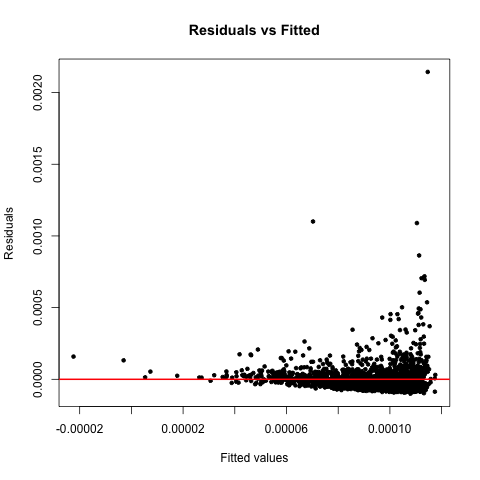

In [143]:
%%R
plot(fitted(model), residuals, 
     xlab = "Fitted values", 
     ylab = "Residuals", 
     main = "Residuals vs Fitted",
     pch = 20) 
abline(h = 0, col = "red", lwd = 2)  

### The model overpredicted ^

## Same regression for Lousiana

In [144]:
%%R

df_louisiana <- df %>% 
  filter(State_x == "Louisiana")

model_la <- lm(schools_per_capita ~ pop_density + med_incE + education_percentage + poverty_percentage + white_percentage, data = df_louisiana)
summary(model_la)


Call:
lm(formula = schools_per_capita ~ pop_density + med_incE + education_percentage + 
    poverty_percentage + white_percentage, data = df_louisiana)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.171e-05 -1.470e-05 -1.842e-06  2.035e-05  1.094e-04 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)           2.435e-05  8.196e-05   0.297   0.7679  
pop_density           4.824e-08  5.642e-08   0.855   0.3974  
med_incE              6.244e-10  7.364e-10   0.848   0.4013  
education_percentage -2.984e-04  1.700e-04  -1.755   0.0865 .
poverty_percentage    3.767e-04  1.647e-04   2.287   0.0273 *
white_percentage     -9.106e-05  4.340e-05  -2.098   0.0420 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.243e-05 on 42 degrees of freedom
Multiple R-squared:  0.3963,	Adjusted R-squared:  0.3244 
F-statistic: 5.515 on 5 and 42 DF,  p-value: 0.000544



In [145]:
%%R
residuals <- model$residuals

In [146]:
%%R
head(residuals)

            1             2             3             4             5 
-5.899747e-06 -1.302871e-05 -2.225715e-05 -1.686953e-05 -4.195439e-05 
            6 
 1.149730e-04 


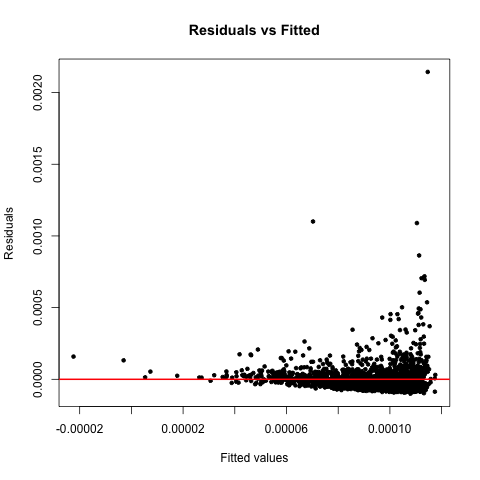

In [147]:
%%R
plot(fitted(model), residuals, 
     xlab = "Fitted values", 
     ylab = "Residuals", 
     main = "Residuals vs Fitted",
     pch = 20) 
abline(h = 0, col = "red", lwd = 2)  

## Let's clean the dataset that has the demographics of each school  


In [100]:
import pandas as pd
df=pd.read_csv('race.csv')
df

,PFNLWT,REPW1,REPW2,REPW3,REPW4,REPW5,REPW6,REPW7,REPW8,REPW9,...,S1_F_P610,S1_F_P620,S1_F_P622,S1_F_P630,S1_F_P635,S1_F_P640,S1_F_P645,S1_F_P650,S1_F_P655,S1_F_P660
0,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,...,0,0,0,0,0,0,0,0,0,0
1,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,...,0,0,0,0,0,0,0,0,0,0
2,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,...,0,0,0,0,0,0,0,0,0,0
3,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,...,0,0,0,0,0,0,0,0,0,0
4,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,...,0,0,0,0,0,0,0,0,0,0
22341,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,...,0,0,0,0,0,0,0,0,0,0
22342,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,...,0,0,0,0,0,0,0,0,0,0
22343,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,...,0,0,0,0,0,0,0,0,0,0


In [101]:
columns_to_keep = [
    'PCNTNM', 'PINST','PPHONE', 'PCNTY', 'PCNTY22',
    'P_INDIAN', 'P_ASIAN', 'P_PACIFIC', 'P_HISP',
    'P_WHITE', 'P_BLACK', 'P_TR', 'STTCH_RT', 'PSTABB', 'PZIP', 'RELIG',
    'ORIENT'    
]

df_subset = df[columns_to_keep]
df_subset

,PCNTNM,PINST,PPHONE,PCNTY,PCNTY22,P_INDIAN,P_ASIAN,P_PACIFIC,P_HISP,P_WHITE,P_BLACK,P_TR,STTCH_RT,PSTABB,PZIP,RELIG,ORIENT
0,ETOWAH,ST JAMES CATHOLIC SCHOOL,2.565460e+09,55,5501,0.000000,4.672897,0.000000,44.859813,18.691589,23.364486,8.411215,8.492063,AL,35901,1,1
1,TUSCALOOSA,HOLY SPIRIT CATHOLIC SCHOOL,2.055536e+09,125,12501,0.000000,16.581633,0.255102,11.479592,53.061224,12.500000,6.122449,9.267139,AL,35405,1,1
2,MADISON,HOLY FAMILY PAROCHIAL SCHOOL,2.565395e+09,89,8901,0.000000,0.000000,1.129944,53.672316,25.988701,14.689266,4.519774,11.346154,AL,35816,1,1
3,MADISON,HOLY SPIRIT REGIONAL CATHOLIC SCHOOL,2.568815e+09,89,8901,0.000000,3.457447,0.531915,17.021277,73.670213,0.797872,4.521277,11.190476,AL,35802,1,1
4,JEFFERSON,OUR LADY OF SORROWS,2.058793e+09,73,7301,0.000000,2.083333,0.000000,9.226190,68.750000,14.583333,5.357143,14.000000,AL,35209,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,TRAVIS,HYDE PARK SCHOOL,5.124658e+09,453,45348,0.405954,1.894452,0.676590,5.412720,85.115020,1.217862,5.277402,9.414013,TX,78765,2,5
22341,FAYETTE,SAYRE SCHOOL,8.592541e+09,67,6721,0.000000,5.333333,0.190476,5.904762,78.476190,3.047619,7.047619,8.152174,KY,40507,3,30
22342,TARRANT,FORT WORTH CHRISTIAN SCHOOL,8.175206e+09,439,43948,0.920810,2.578269,0.000000,8.655617,58.379374,3.130755,26.335175,10.773810,TX,76180,2,8
22343,HARRIS,SECOND BAPTIST SCHOOL,7.133652e+09,201,20148,0.000000,3.036649,0.000000,8.376963,83.141361,1.570681,3.874346,8.925234,TX,77057,2,5


In [102]:
df_subset = df_subset.rename(columns={'PSTABB': 'State'})
df_subset = df_subset.rename(columns={'PINST': 'NAME'})
df_subset = df_subset.rename(columns={'PZIP': 'ZIP'})

In [103]:
df_subset

,PCNTNM,NAME,PPHONE,PCNTY,PCNTY22,P_INDIAN,P_ASIAN,P_PACIFIC,P_HISP,P_WHITE,P_BLACK,P_TR,STTCH_RT,State,ZIP,RELIG,ORIENT
0,ETOWAH,ST JAMES CATHOLIC SCHOOL,2.565460e+09,55,5501,0.000000,4.672897,0.000000,44.859813,18.691589,23.364486,8.411215,8.492063,AL,35901,1,1
1,TUSCALOOSA,HOLY SPIRIT CATHOLIC SCHOOL,2.055536e+09,125,12501,0.000000,16.581633,0.255102,11.479592,53.061224,12.500000,6.122449,9.267139,AL,35405,1,1
2,MADISON,HOLY FAMILY PAROCHIAL SCHOOL,2.565395e+09,89,8901,0.000000,0.000000,1.129944,53.672316,25.988701,14.689266,4.519774,11.346154,AL,35816,1,1
3,MADISON,HOLY SPIRIT REGIONAL CATHOLIC SCHOOL,2.568815e+09,89,8901,0.000000,3.457447,0.531915,17.021277,73.670213,0.797872,4.521277,11.190476,AL,35802,1,1
4,JEFFERSON,OUR LADY OF SORROWS,2.058793e+09,73,7301,0.000000,2.083333,0.000000,9.226190,68.750000,14.583333,5.357143,14.000000,AL,35209,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,TRAVIS,HYDE PARK SCHOOL,5.124658e+09,453,45348,0.405954,1.894452,0.676590,5.412720,85.115020,1.217862,5.277402,9.414013,TX,78765,2,5
22341,FAYETTE,SAYRE SCHOOL,8.592541e+09,67,6721,0.000000,5.333333,0.190476,5.904762,78.476190,3.047619,7.047619,8.152174,KY,40507,3,30
22342,TARRANT,FORT WORTH CHRISTIAN SCHOOL,8.175206e+09,439,43948,0.920810,2.578269,0.000000,8.655617,58.379374,3.130755,26.335175,10.773810,TX,76180,2,8
22343,HARRIS,SECOND BAPTIST SCHOOL,7.133652e+09,201,20148,0.000000,3.036649,0.000000,8.376963,83.141361,1.570681,3.874346,8.925234,TX,77057,2,5


In [104]:
df_subset.to_csv('private_schools_demographic.csv')

## Let's merge 

In [105]:
('4_23_private_schoolswithpopulation.csv')

'4_23_private_schoolswithpopulation.csv'

In [106]:
import pandas as pd

df=pd.read_csv("4_23_private_schoolswithpopulation.csv")
df[df['NAME']=='ST JAMES CATHOLIC SCHOOL']

,Unnamed: 0,County,State,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract
2855,2855,Chatham County,Georgia,13051,296266,NaN,145541,1392,119042,1347,...,1,496,"Savannah-Hinesville-Statesboro, GA",N,N,1301,13163,13001,2021-2022,13051011104
3338,3338,Clay County,Kansas,20027,8088,NaN,7702,46,150,4,...,1,556,"Wichita-Winfield, KS",N,N,2004,20077,20016,2021-2022,20027458100
5143,5143,Denver County,Colorado,8031,710800,NaN,467213,4188,63002,1333,...,1,216,"Denver-Aurora, CO",N,N,801,8006,8031,2021-2022,8031003601
5825,5825,Elmore County,Alabama,1051,87694,NaN,64769,458,18276,624,...,1,N,N,N,N,104,1028,1010,2021-2022,1051031300
6096,6096,Fairfax city,Virginia,51600,24242,NaN,14452,368,1423,120,...,1,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",N,N,5108,51053,51035,2021-2022,51600300100
7199,7199,Guadalupe County,Texas,48187,173828,NaN,114005,1872,14857,935,...,1,484,"San Antonio-New Braunfels-Pearsall, TX",N,N,4815,48044,48021,2021-2022,48187210300
7549,7549,Hardin County,Kentucky,21093,111005,NaN,85855,460,13155,639,...,1,350,Louisville/Jefferson County--Elizabethtown--Ba...,N,N,2102,21025,21010,2021-2022,21093000904
7819,7819,Harrison County,Mississippi,28047,208748,NaN,135147,719,51802,1029,...,1,N,N,N,N,2804,28117,28049,2021-2022,28047003105
8972,8972,Jefferson County,Kentucky,21111,779232,NaN,526215,1908,171527,1679,...,1,350,Louisville/Jefferson County--Elizabethtown--Ba...,N,N,2103,21034,21019,2021-2022,21111011508
12802,12802,Miami-Dade County,Florida,12086,2688237,NaN,1259156,10841,426417,3204,...,1,370,"Miami-Port St. Lucie-Fort Lauderdale, FL",N,N,1224,12108,12038,2021-2022,12086000307


In [107]:
%%R 

df <- read.csv('4_23_private_schoolswithpopulation.csv') 
new_census_data_df <- read.csv('private_schools_demographic.csv') 
total_2 <- merge(df, new_census_data_df, by = c("NAME", "ZIP"), all = FALSE)

In [108]:
%%R 
write.csv(total_2, "4.24_1.csv", row.names = FALSE)

In [109]:
import pandas as pd
df=pd.read_csv("4.24_1.csv")
df

,NAME,ZIP,X.x,County,State.x,GEOID,total_popE,total_popM,whiteE,whiteM,...,P_ASIAN,P_PACIFIC,P_HISP,P_WHITE,P_BLACK,P_TR,STTCH_RT,State.y,RELIG,ORIENT
0,-- MANSFIELD CHRISTIAN SCHOOL-,44907,17584,Ross County,Ohio,39141,76957,NaN,68763,369,...,2.173913,0.0,1.505017,86.622074,3.344482,6.354515,13.939394,OH,2,8
1,"(CHRISTIAN BRETHREN OF WARWICK, INC. DBA)",2886,9428,Kent County,Rhode Island,44003,170168,NaN,149362,684,...,0.000000,0.0,25.000000,62.500000,0.000000,12.500000,13.333333,RI,2,29
2,1 SCHOOL RD,28806,2193,Buncombe County,North Carolina,37021,269449,NaN,229554,1155,...,0.000000,0.0,0.000000,100.000000,0.000000,0.000000,1.000000,NC,3,30
3,1955,29203,17247,Richland County,South Carolina,45079,416161,NaN,176478,1203,...,0.000000,0.0,0.000000,0.000000,87.096774,0.000000,2.605042,SC,2,5
4,1ST CEREBRAL PALSY OF NJ,7109,6023,Essex County,New Jersey,34013,853374,NaN,302714,4028,...,5.084746,0.0,69.491525,11.864407,13.559322,0.000000,6.555556,NJ,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21545,ZION TEMPLE CHRISTIAN ACADEMY,45229,7395,Hamilton County,Ohio,39061,827671,NaN,541412,1761,...,0.000000,0.0,2.222222,0.000000,97.777778,0.000000,11.250000,OH,2,26
21546,ZION-ST JOHN LUTHERAN SCHOOL,51046,14917,O'Brien County,Iowa,19141,14138,NaN,12933,178,...,0.000000,0.0,2.127660,97.872340,0.000000,0.000000,7.121212,IA,2,20
21547,ZION'S HILL BAPTIST SCHOOL,47441,7321,Hamilton County,Indiana,18057,349527,NaN,290880,1257,...,0.000000,0.0,0.000000,100.000000,0.000000,0.000000,2.500000,IN,2,5
21548,ZUNI CHRISTIAN MISSION SCHOOL,87327,10850,Los Alamos County,New Mexico,35028,19253,NaN,15140,364,...,0.000000,0.0,0.000000,5.208333,0.000000,0.000000,8.807339,NM,2,7


In [110]:
df['RELIG'].value_counts()

RELIG
2    9420
3    7126
1    5004
Name: count, dtype: int64

In [111]:
df[df['RELIG']== 1].head(20)

,NAME,ZIP,X.x,County,State.x,GEOID,total_popE,total_popM,whiteE,whiteM,...,P_ASIAN,P_PACIFIC,P_HISP,P_WHITE,P_BLACK,P_TR,STTCH_RT,State.y,RELIG,ORIENT
11,3246 PIERCE,48025,14992,Oakland County,Michigan,26125,1272264,NaN,913135,2174,...,0.000000,0.000000,0.420168,98.739496,0.840336,0.000000,10.867580,MI,1,1
65,ABERDEEN CATHOLIC SCHOOLS,57401,2044,Brown County,South Dakota,46013,38278,NaN,33055,154,...,1.694915,1.129944,5.649718,86.440678,0.564972,1.694915,9.365079,SD,1,1
133,ACADEMY OF HOLY ANGELS,55423,7946,Hennepin County,Minnesota,27053,1270787,NaN,876481,2759,...,15.312500,0.000000,3.593750,58.437500,12.968750,9.375000,10.774411,MN,1,1
137,ACADEMY OF MOUNT ST URSULA,10458,1794,Bronx County,New York,36005,1443229,NaN,258727,5045,...,5.190311,0.000000,63.667820,2.768166,26.989619,1.384083,15.621622,NY,1,1
138,ACADEMY OF NOTRE DAME,1879,13130,Middlesex County,Massachusetts,25017,1623109,NaN,1154437,3674,...,18.539326,4.213483,8.988764,56.741573,7.584270,3.932584,8.476190,MA,1,1
139,ACADEMY OF OUR LADY AT ST CATHARINE,7452,1232,Bergen County,New Jersey,34003,953243,NaN,593955,3815,...,6.074766,0.000000,4.672897,76.635514,0.467290,12.149533,12.969697,NJ,1,1
140,"ACADEMY OF OUR LADY OF MERCY, LAURALTON HALL",6460,19225,South Central Connecticut Planning Region,Connecticut,9170,571298,NaN,385872,2908,...,7.361963,0.000000,6.134969,72.392638,5.521472,7.975460,10.550162,CT,1,1
141,ACADEMY OF OUR LADY OF MOUNT CARMEL,7670,1155,Bergen County,New Jersey,34003,953243,NaN,593955,3815,...,24.766355,0.000000,11.682243,33.644860,14.018692,15.887850,13.544304,NJ,1,1
142,ACADEMY OF OUR LADY OF PEACE,92116,17906,San Diego County,California,6073,3289701,NaN,1899871,9043,...,5.733333,1.600000,40.000000,32.000000,1.466667,18.933333,17.006803,CA,1,1
143,ACADEMY OF SAINT ELIZABETH,7961,14202,Morris County,New Jersey,34027,508816,NaN,375503,2296,...,0.000000,0.000000,5.288462,89.903846,1.923077,2.884615,7.703704,NJ,1,1


In [118]:
df['asian_percentage_in_county']=df['asianE']/df['total_popE']

## These outliers show high asian student population but low asian county population

In [121]:
df[(df['State.x'] == 'Louisiana') & (df['P_ASIAN'] >= 40)]

,NAME,ZIP,X.x,County,State.x,GEOID,total_popE,total_popM,whiteE,whiteM,...,P_HISP,P_WHITE,P_BLACK,P_TR,STTCH_RT,State.y,RELIG,ORIENT,asian_percentage,asian_percentage_in_county
8699,LAKE CASTLE PRIVATE SCHOOL,70127,15713,Orleans Parish,Louisiana,22071,380408,NaN,123390,880,...,1.944444,6.944444,39.444444,0.277778,16.289593,LA,3,30,0.028075,0.028075
18183,STEPPING STONES MONTESSORI,70056,9100,Jefferson Parish,Louisiana,22051,436171,NaN,245470,2221,...,2.439024,29.268293,7.317073,12.195122,4.141414,LA,3,30,0.041559,0.041559
20284,UNIVERSITY MONTESSORI SCHOOL,70118,15727,Orleans Parish,Louisiana,22071,380408,NaN,123390,880,...,0.000000,50.000000,0.000000,0.000000,0.952381,LA,3,30,0.028075,0.028075
